In [4]:
# Set dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

#time series 
# Start = YYYY-MM-DD
# End = YYYY-MM-DD

#Url_Setup for BPI
base_url = "https://api.coindesk.com/v1/bpi/historical/close.json?"
Start = '2020-11-02'
End = '2020-11-10'
query_url = f'{base_url}start={Start}&end={End}'


pprint(requests.get(query_url).json())

#Data set up for Dow Jones during Election (11-2 - 11/10)
# Read CSV
DJIA_data = pd.read_csv("data/DJIA.csv")
DJIA_data.rename(columns = {'DATE':'close date'}, inplace = True)
DJIA_data

#Data for Gold (11-2 - 11/10)
Gold_data = pd.read_csv("data/Gold Price.csv")
Gold_data.rename(columns = {'Date':'close date'}, inplace = True)
Gold_data



{'bpi': {'2020-11-02': 13567.2233,
         '2020-11-03': 14030.79,
         '2020-11-04': 14158.81,
         '2020-11-05': 15593.555,
         '2020-11-06': 15589.0033,
         '2020-11-07': 14843.945,
         '2020-11-08': 15489.47,
         '2020-11-09': 15334.87,
         '2020-11-10': 15313.4433},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index. '
               'BPI value data returned as USD.',
 'time': {'updated': 'Nov 11, 2020 00:03:00 UTC',
          'updatedISO': '2020-11-11T00:03:00+00:00'}}


,close date,Gold Price
0,2020-11-10,1876.4
1,2020-11-09,1854.4
2,2020-11-06,1951.7
3,2020-11-05,1946.8
4,2020-11-04,1896.2
5,2020-11-03,1910.4
6,2020-11-02,1892.5


In [5]:
#response get for BPI
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df= pd.DataFrame(list(my_dict.items()),columns=['close date','close price'])
test_df['close price'] = test_df['close price'].round(2)
test_df.rename(columns = {'close price':'Bitcoin Close'}, inplace = True)
test_df

# #Combine DF for Dow and BPI
combined_DowBPI_data = pd.merge(test_df, DJIA_data, on="close date", how="outer")
clean_combined = combined_DowBPI_data.dropna()

combined_DowBPIGold_data = pd.merge(clean_combined, Gold_data, on="close date", how="outer")
combined_DowBPIGold_data


##Dow and Gold was closed on the weekend

,close date,Bitcoin Close,DJIA,Gold Price
0,2020-11-02,13567.22,26925.05,1892.5
1,2020-11-03,14030.79,27480.03,1910.4
2,2020-11-04,14158.81,27847.66,1896.2
3,2020-11-05,15593.56,28390.18,1946.8
4,2020-11-06,15589.00,28323.40,1951.7
5,2020-11-09,15334.87,29157.97,1854.4
6,2020-11-10,15313.44,29420.92,1876.4


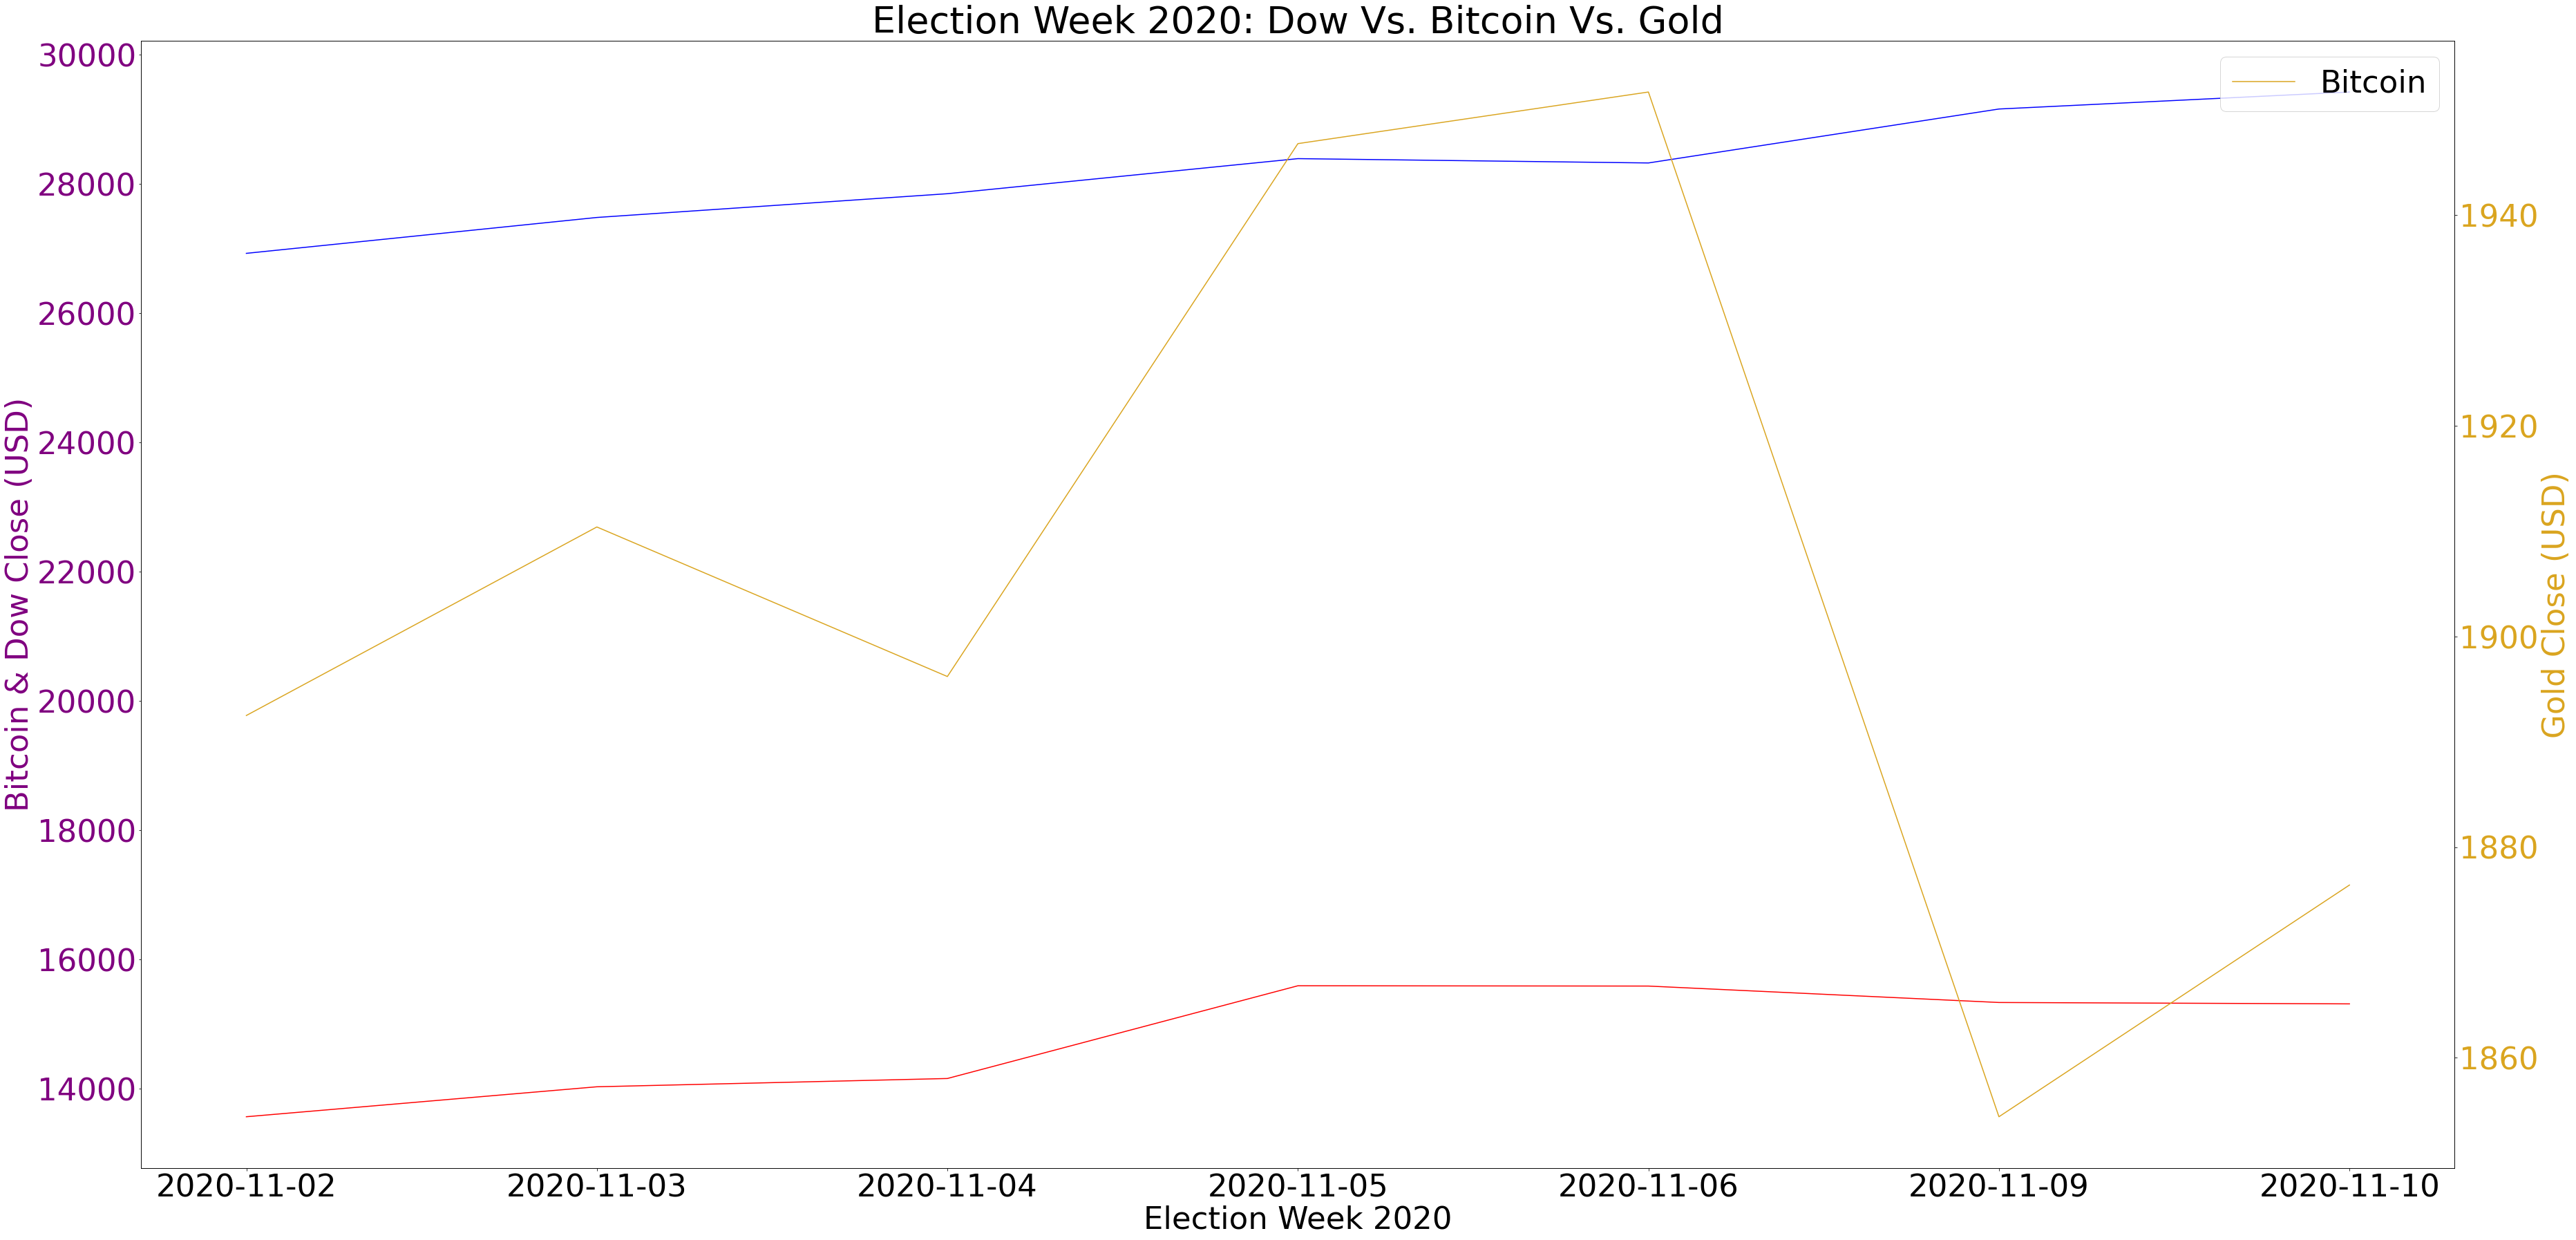

In [16]:
#plotting for bitcoin index
# x_axis = test_df['close date']
# y_axis = test_df['Bitcoin Close']
# plt.plot(x_axis, y_axis)

#Wonky Line Chart
# Bitcoin = plt.plot(clean_combined['close date'], clean_combined['Bitcoin Close'], color="red", label="Bitcoin")
# Dow = plt.plot(clean_combined['close date'], clean_combined['DJIA'], color="blue", label="Dow")
# Gold = plt.plot(combined_DowBPIGold_data['close date'], combined_DowBPIGold_data['Gold Price'], color="green", label="Gold")
# # Plot laeling
# plt.title("Election Week 2020: Dow Vs. Bitcoin Vs. Gold")
# plt.ylabel("Close Price (USD)")
# plt.xlabel("Dates")
# plt.rcParams["figure.figsize"] = (60,30)
# plt.rcParams.update({'font.size': 60})
# # Show the chart
# plt.legend(['Dow', 'Bitcoin','Gold'])
# plt.show()

#Better Chart with 2 axis 
fig, ax1 = plt.subplots()
color_bit ='red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'
ax1.set_xlabel('Election Week 2020')
ax1.set_ylabel('Bitcoin & Dow Close (USD)', color =color_label)
ax1.plot(clean_combined['close date'], clean_combined['Bitcoin Close'], color=color_bit)
ax1.plot(clean_combined['close date'],clean_combined['DJIA'],color=color_dow)
ax1.tick_params(axis='y', labelcolor=color_label)

ax2=ax1.twinx()

ax2.set_ylabel('Gold Close (USD)', color =color_gold)
ax2.plot(combined_DowBPIGold_data['close date'],combined_DowBPIGold_data['Gold Price'],color=color_gold)
ax2.tick_params(axis='y', labelcolor=color_gold)

plt.title("Election Week 2020: Dow Vs. Bitcoin Vs. Gold")
plt.rcParams["figure.figsize"] = (60,30)
plt.rcParams.update({'font.size': 45})
plt.legend(['Bitcoin', 'Dow','Gold'])
plt.show()



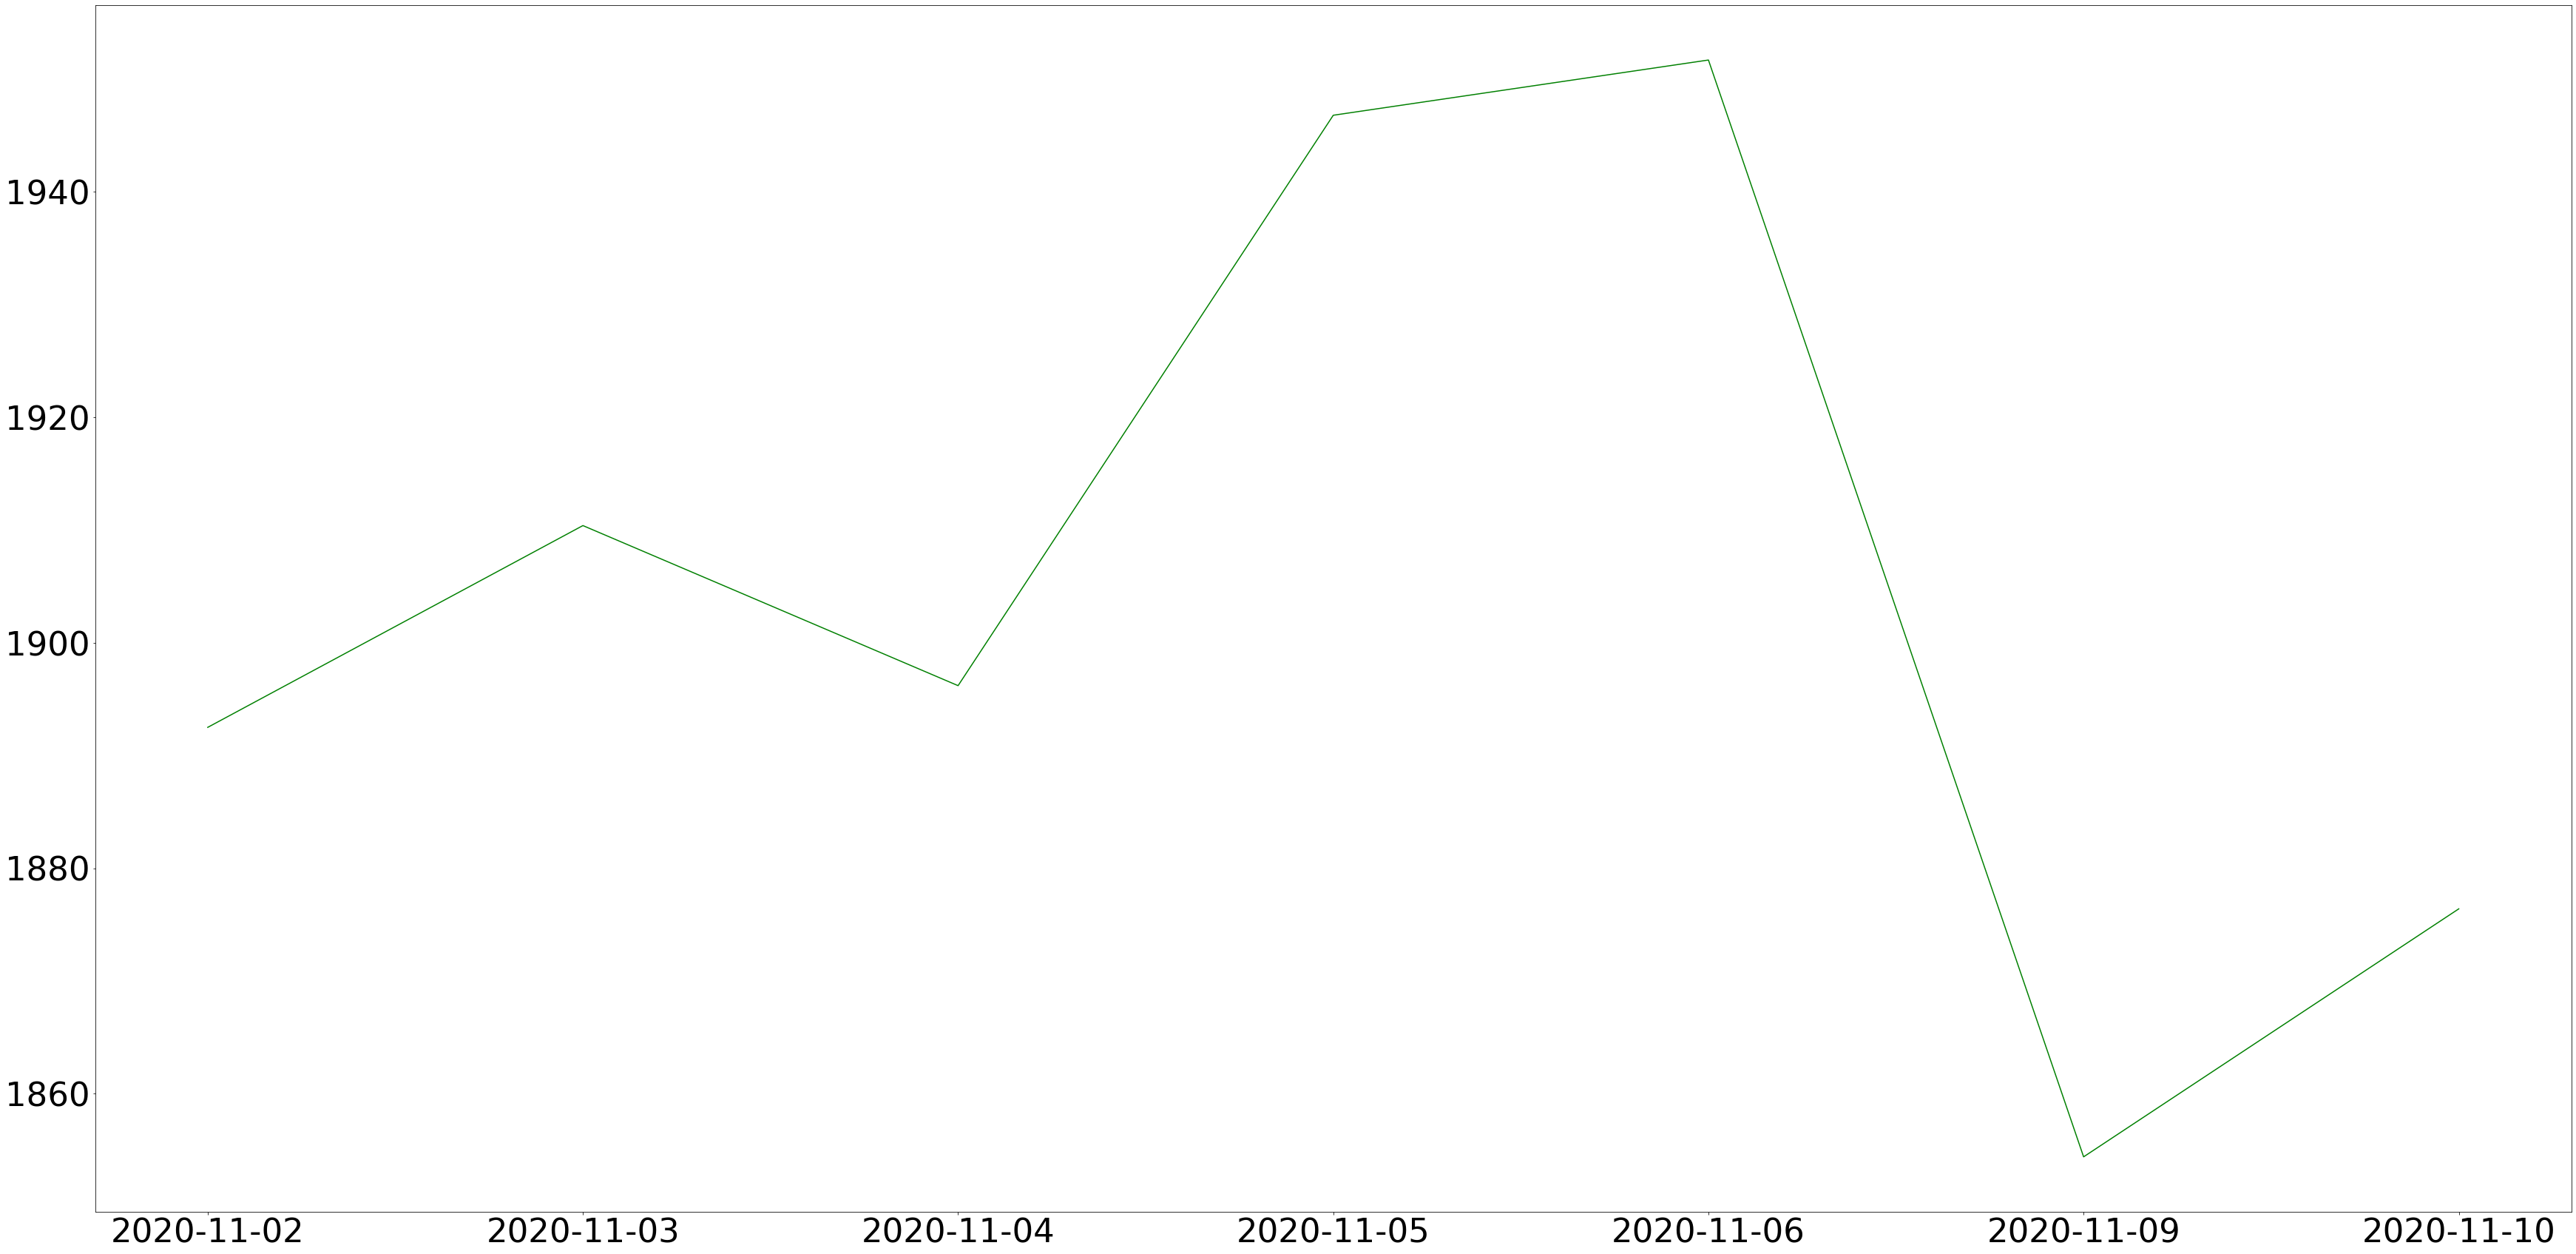

In [13]:
Gold = plt.plot(combined_DowBPIGold_data['close date'], combined_DowBPIGold_data['Gold Price'], color="green", label="Gold")

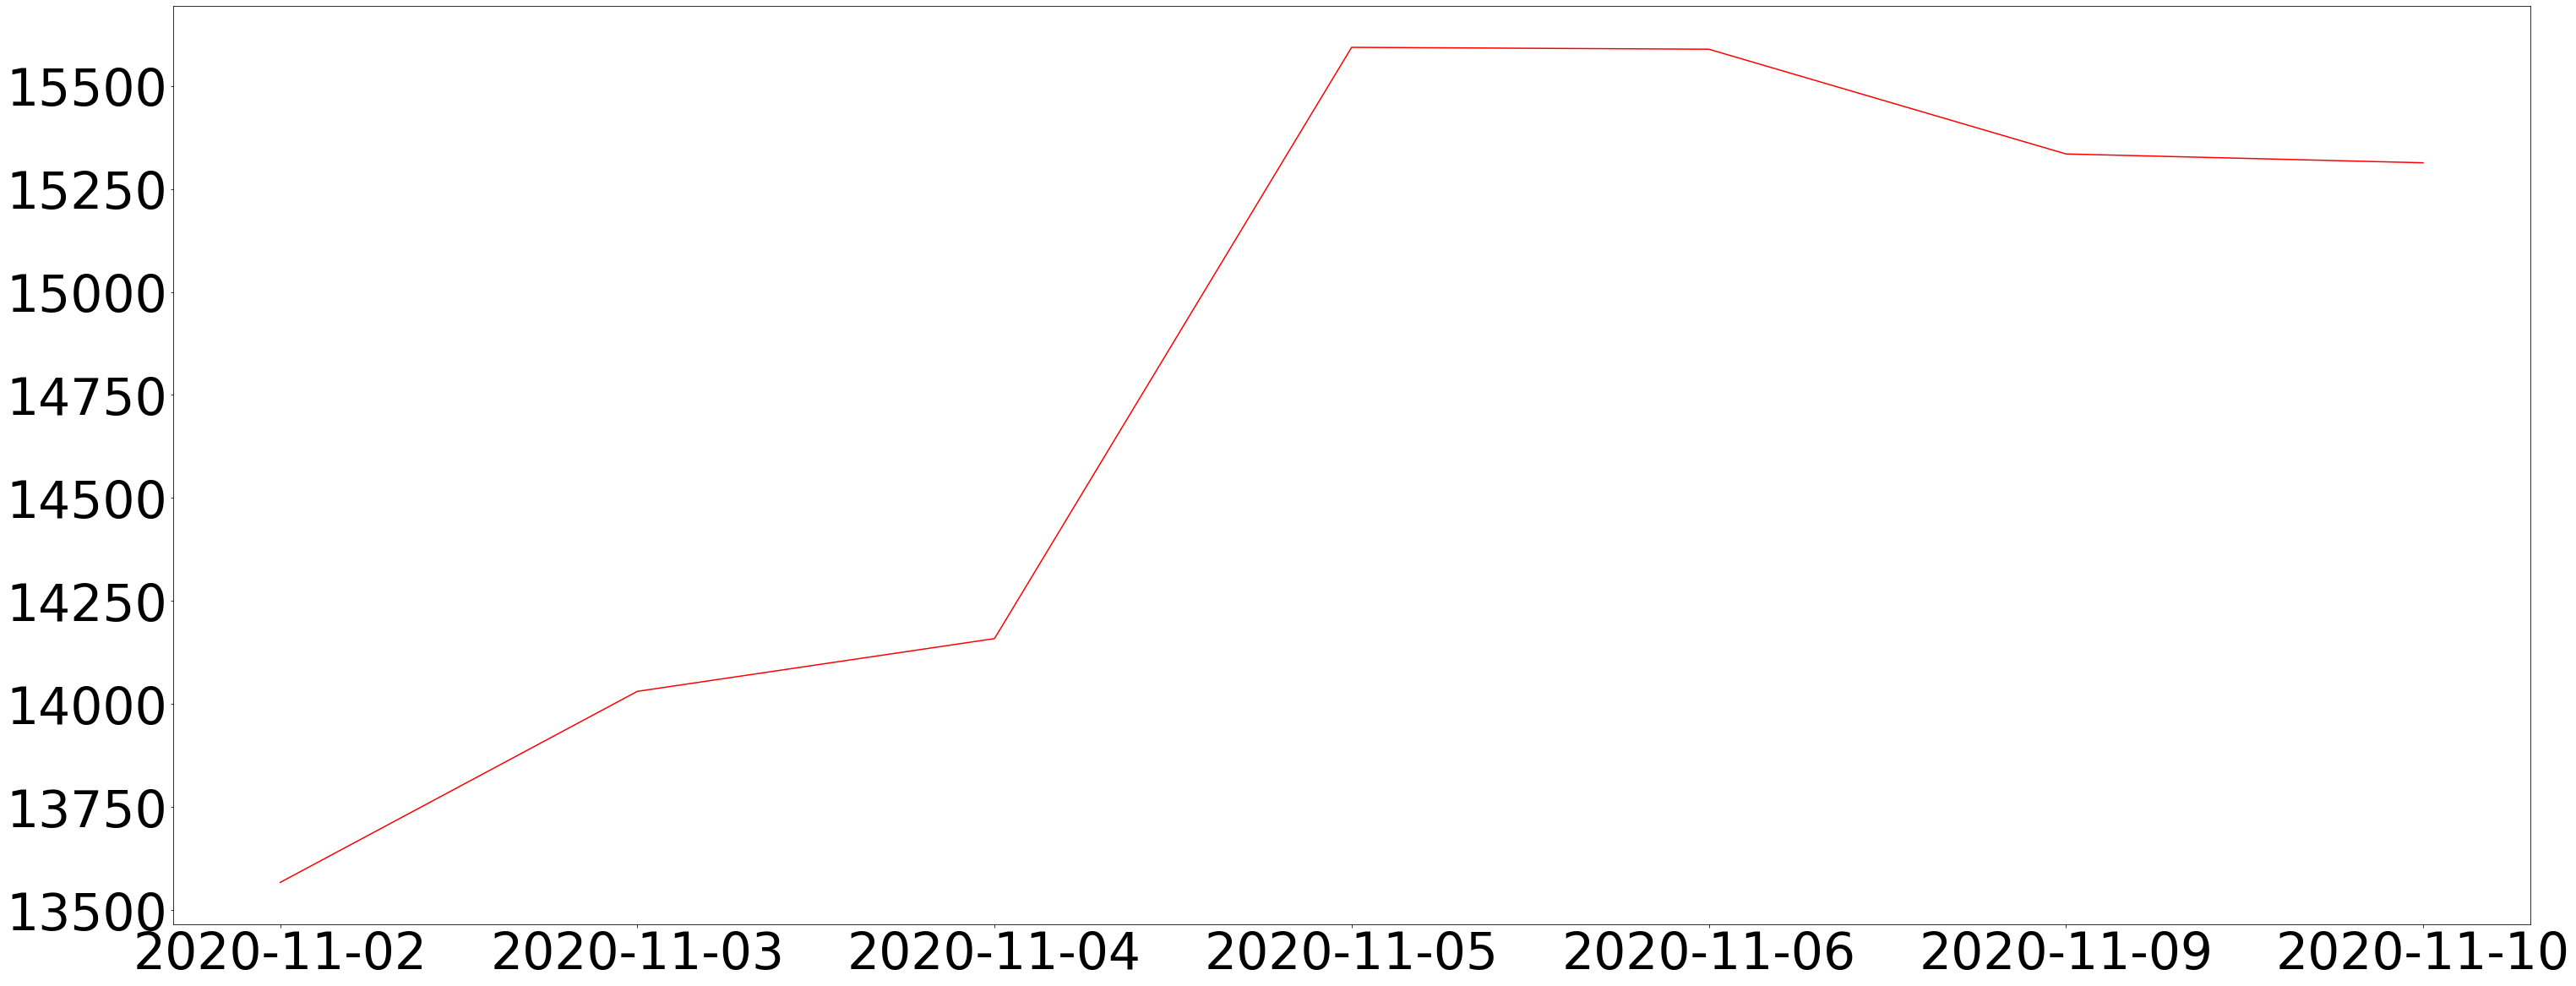

In [66]:
Bitcoin = plt.plot(clean_combined['close date'], clean_combined['Bitcoin Close'], color="red", label="Bitcoin")

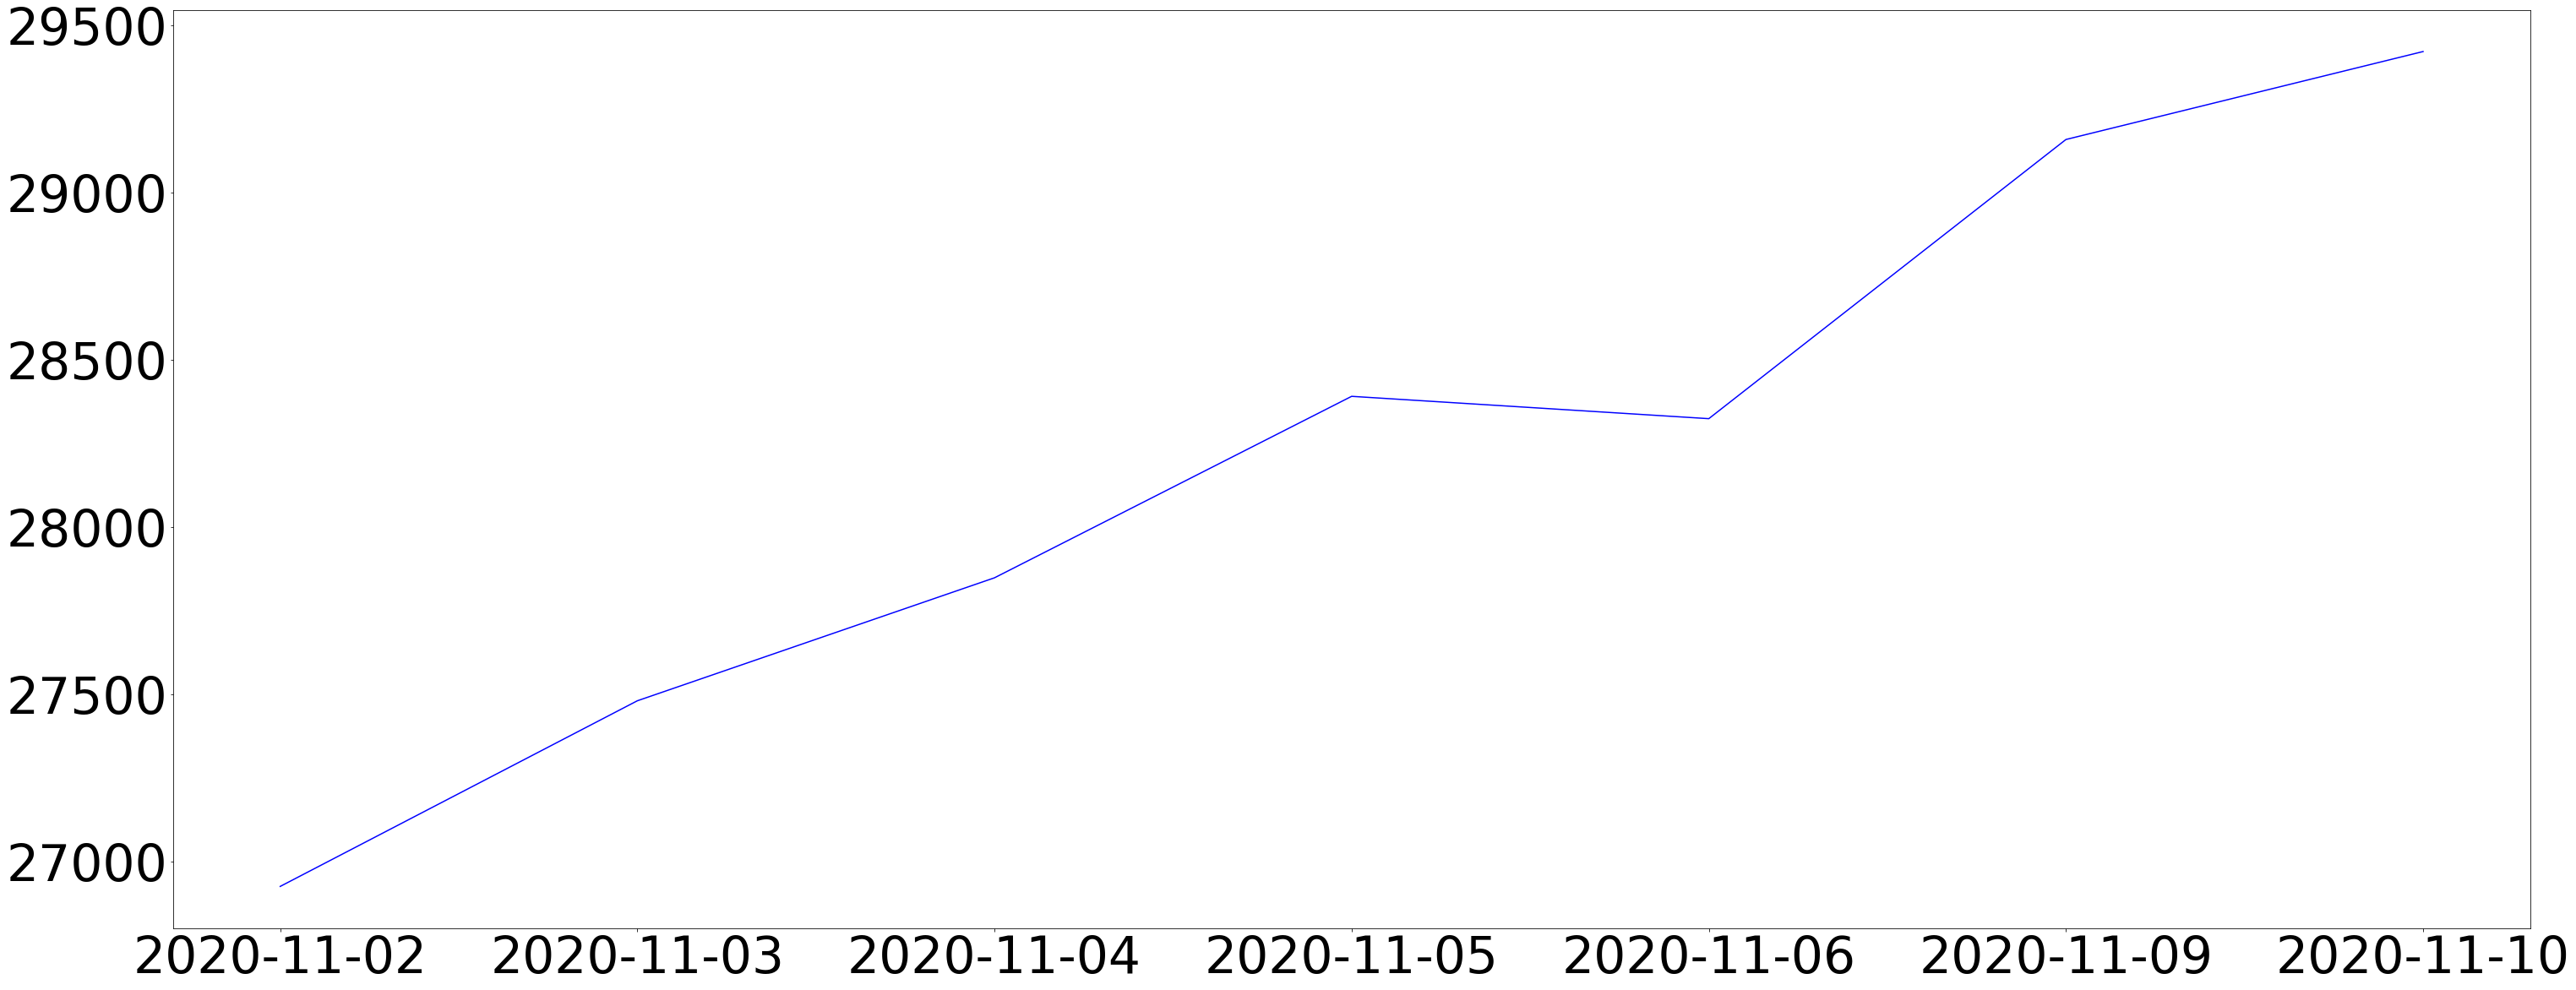

In [67]:
Dow = plt.plot(clean_combined['close date'], clean_combined['DJIA'], color="blue", label="Dow")